### **Gaussian Mixture Models (GMMs)**

#### Probabilistic Clustering and Soft Assignments
Most clustering algorithms, like k-means, assign data points to the closest cluster in terms of distance, resulting in a hard assignment. Each data point belongs entirely to one cluster. However, in many real-world scenarios, the boundaries between clusters aren't always clear-cut. This is where probabilistic clustering comes in.

Gaussian Mixture Models (GMMs) provide a probabilistic approach to clustering. Instead of assigning each data point to a single cluster, GMMs give probabilities that a given data point belongs to each cluster. This method results in "soft assignments," where a data point can belong to multiple clusters but with different degrees of membership.

#### Expectation-Maximization (EM) in the Context of GMM
GMMs are based on the assumption that the data is generated from a mixture of several Gaussian distributions. The goal is to identify these underlying Gaussians and their parameters.

However, a direct estimation of parameters is challenging because we don't know which data point belongs to which Gaussian. Here's where the Expectation-Maximization (EM) algorithm comes in. EM is an iterative method that consists of two main steps:

1. **Expectation (E-step)**: Given the current estimates of the Gaussian parameters, assign each data point to the Gaussians probabilistically (calculate the "responsibilities").
  
2. **Maximization (M-step)**: Given the current assignments (or responsibilities), update the parameters of the Gaussians to best fit the data.

These steps are repeated until convergence, resulting in optimized parameters for the Gaussian distributions.

#### Ability to Identify Elliptical Clusters
While k-means tends to find spherical clusters due to its distance metric, GMMs can identify elliptical (or elongated) clusters. This capability comes from the fact that each cluster in GMM is modeled by a Gaussian distribution, which can take on elliptical shapes depending on its covariance matrix.

#### Key Parameters for GMM


1. **`n_components`**: 
    - **Description**: The number of mixture components (or Gaussian distributions) to be estimated.
    - **Default**: 1
    - **Typical Usage**: Choose based on the expected number of clusters in the data.

2. **`covariance_type`**:
    - **Description**: The type of covariance matrix for each component.
    - **Options**:
        - `'full'`: Each component has its own general covariance matrix.
        - `'tied'`: All components share the same general covariance matrix.
        - `'diag'`: Each component has its own diagonal covariance matrix.
        - `'spherical'`: Each component has its own single variance.
    - **Default**: `'full'`
    - **Typical Usage**: Choice depends on the underlying data distribution and prior knowledge.

3. **`tol`**:
    - **Description**: Convergence threshold. The EM iterations will stop when the lower bound average gain is below this threshold.
    - **Default**: 1e-3
    - **Typical Usage**: Adjust if the model has convergence issues.

4. **`reg_covar`**:
    - **Description**: Non-negative regularization added to the diagonal of the covariance matrix to ensure the matrix is positive definite.
    - **Default**: 1e-6
    - **Typical Usage**: Can be increased if there are numerical issues during fitting.

5. **`n_init`**:
    - **Description**: Number of times the algorithm will be run with different initializations. The final results will be the best output of `n_init` consecutive runs in terms of the lowest Akaike Information Criterion (AIC) or Bayesian Information Criterion (BIC).
    - **Default**: 1
    - **Typical Usage**: Can be increased to ensure a better result, especially if the initialization affects the outcome significantly.

6. **`init_params`**:
    - **Description**: Method used to initialize the weights, means, and covariances.
    - **Options**:
        - `'kmeans'`: Parameters are initialized using k-means.
        - `'random'`: Parameters are initialized randomly.
    - **Default**: `'kmeans'`
    - **Typical Usage**: Generally, the default k-means initialization works well, but for some datasets, a random initialization may be beneficial.


### Exercise

In the following, see if you can adjust the GMM parameters so that the fifth cluster appears.


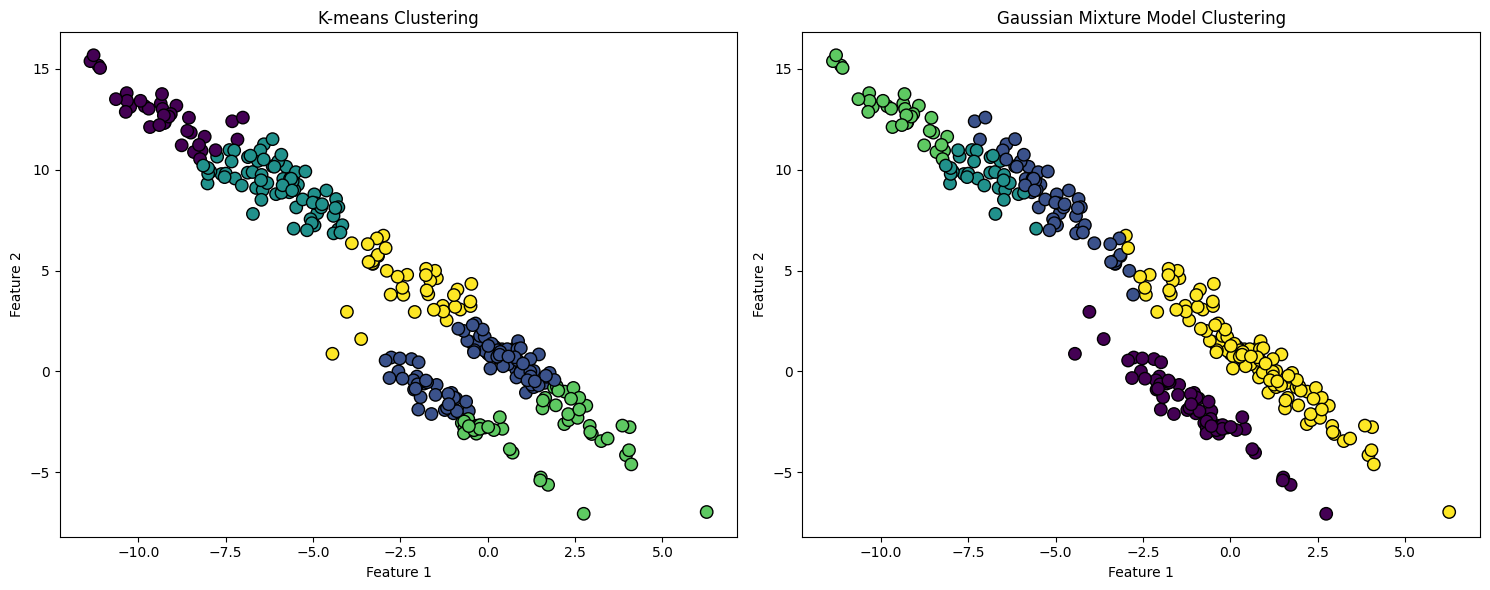

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

# Generate synthetic data with spherical clusters
X, y = make_blobs(n_samples=300, centers=5, cluster_std=2.0,random_state=42)

# Stretch and rotate some of the blobs to create elliptical clusters
transformation_matrix = np.array([[0.6, -0.6], [-0.4, 0.8]])
X_aniso = np.dot(X, transformation_matrix)

# Apply k-means clustering
kmeans = KMeans(n_clusters=5)
kmeans_labels = kmeans.fit_predict(X_aniso)

# Apply GMM
gmm = GaussianMixture(n_components=5)
gmm_labels = gmm.fit_predict(X_aniso)

# Plotting
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=kmeans_labels, cmap='viridis', marker='o', edgecolors='k', s=80)
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 2, 2)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=gmm_labels, cmap='viridis', marker='o', edgecolors='k', s=80)
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()


Note that we can view the mixed membership of each datapoint in a GMM using sklearn's API as follows:

First 10 data points:
 [[-7.33898809 -7.72995396]
 [-7.74004056 -7.26466514]
 [-1.68665271  7.79344248]
 [ 4.42219763  3.07194654]
 [-8.91775173 -7.8881959 ]
 [ 5.49753846  1.81323115]
 [-2.3360167   9.39960351]
 [ 5.05281029  1.40944513]
 [-2.98837186  8.82862715]
 [-3.70050112  9.67083974]]

Probabilities of belonging to each cluster for the first 10 data points:
 [[1.00000000e+00 1.35999675e-60 5.79506157e-67]
 [1.00000000e+00 3.14154567e-60 1.36438005e-64]
 [2.05865579e-51 1.72369478e-15 1.00000000e+00]
 [1.71564500e-45 1.00000000e+00 8.23076192e-24]
 [1.00000000e+00 9.85406873e-70 1.20447754e-71]
 [5.35909457e-46 1.00000000e+00 7.86374676e-33]
 [6.62024106e-62 1.28187028e-22 1.00000000e+00]
 [1.59110948e-42 1.00000000e+00 4.03172216e-32]
 [3.55372635e-57 1.71082744e-22 1.00000000e+00]
 [3.63941531e-62 4.78982670e-27 1.00000000e+00]]


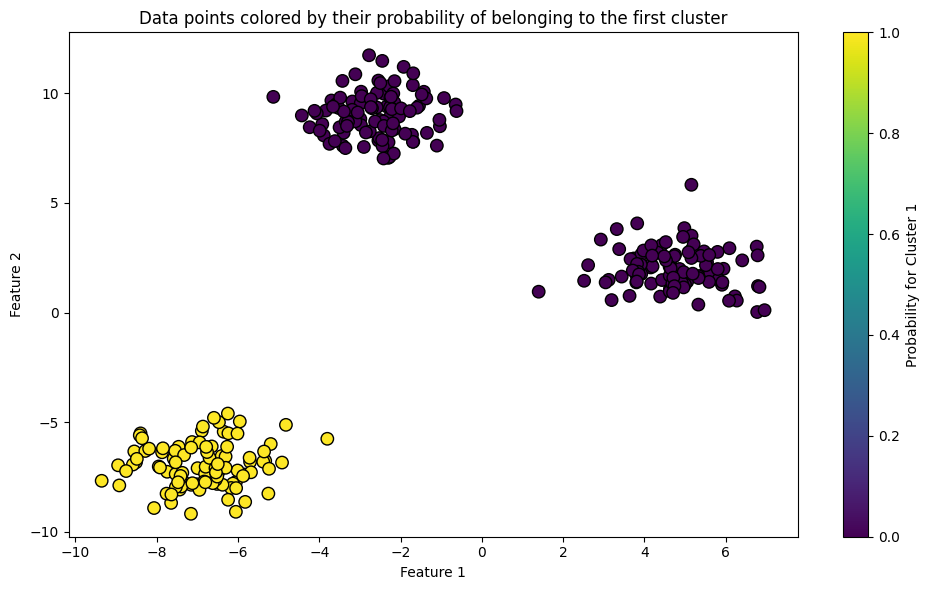

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=3, random_state=42)

# Fit a GMM with 3 components
gmm = GaussianMixture(n_components=3)
gmm.fit(X)

# Obtain mixed membership (soft assignments) for each data point
probs = gmm.predict_proba(X)

# Display the first 10 data points and their probabilities
print("First 10 data points:\n", X[:10])
print("\nProbabilities of belonging to each cluster for the first 10 data points:\n", probs[:10])

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=probs[:, 0], marker='o', edgecolors='k', s=80, cmap='viridis')
plt.title('Data points colored by their probability of belonging to the first cluster')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Probability for Cluster 1')
plt.tight_layout()
plt.show()


Finally, observe that GMM's do not handle concentric clusters well.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


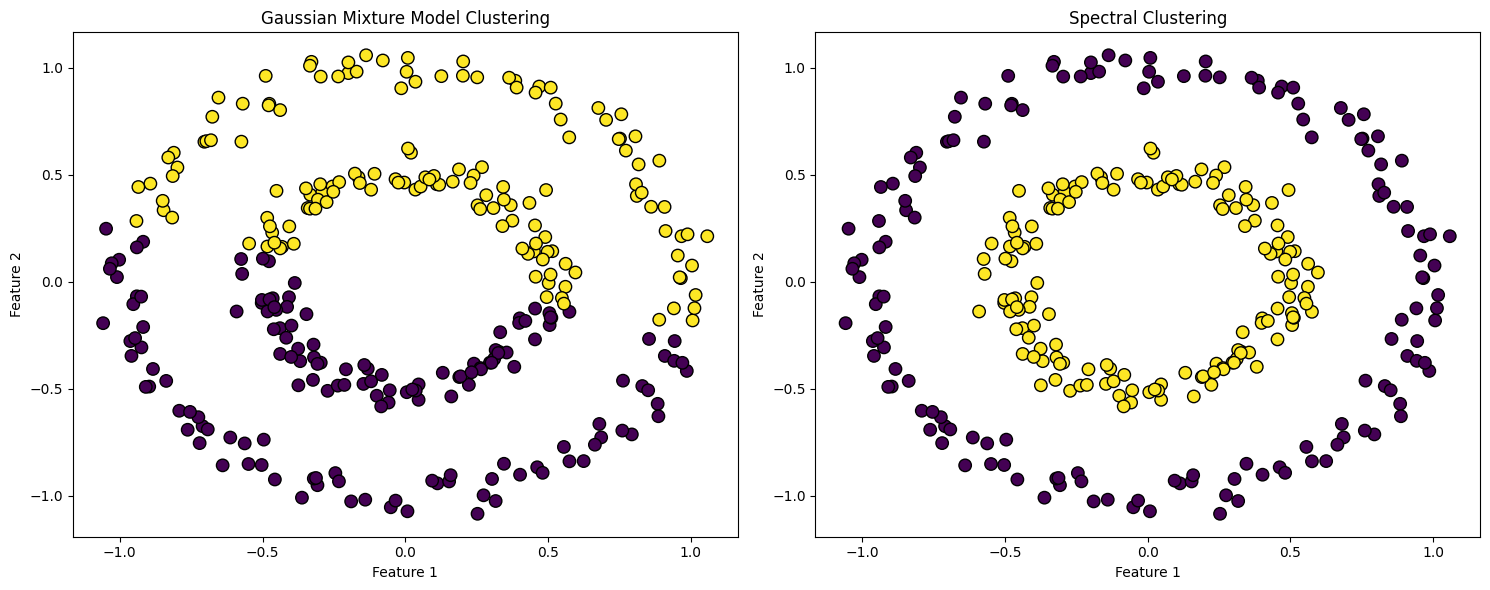

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering

# Generate synthetic data with concentric circles
X, y = make_circles(n_samples=300, factor=0.5, noise=0.05)

# Apply GMM
gmm = GaussianMixture(n_components=2)
gmm_labels = gmm.fit_predict(X)

# Apply Spectral Clustering
spectral = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', n_neighbors=10)
spectral_labels = spectral.fit_predict(X)

# Plotting
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=gmm_labels, cmap='viridis', marker='o', edgecolors='k', s=80)
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=spectral_labels, cmap='viridis', marker='o', edgecolors='k', s=80)
plt.title('Spectral Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()
